In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cftime

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore") 

import cosima_cookbook as cc

from dask.distributed import Client

In [2]:
session = cc.database.create_session()

In [11]:
# Define experiment dictionary
from collections import OrderedDict
exptdict = OrderedDict([
    ('1degIAF',   {'model':'ACCESS-OM2 IAF', 'expt':'1deg_jra55v13_iaf_spinup1_B1', # 1deg IAF run from Kiss et al. 2020
                'n_files':-12, 'itime':pd.datetime(1998,1,1), 'ftime':None}),
    ('025degIAF', {'model':'ACCESS-OM2-025 IAF', 'expt':'025deg_jra55v13_iaf_gmredi6', # 025deg IAF run from Kiss et al. 2020
                'n_files':-34, 'itime':pd.datetime(1998,1,1),'ftime':None}),
    ('01degIAF',  {'model':'ACCESS-OM2-01 IAF',  'expt':'01deg_jra55v13_iaf', # 01deg IAF run from Kiss et al. 2020
                'n_files':None, 'itime':pd.datetime(1998,1,1),'ftime':None}),
    ('1degRYF',   {'model':'ACCESS-OM2 RYF', 'expt':'1deg_jra55_ryf9091_gadi', # 1deg 9091RYF run
                'n_files':-1, 'itime': None,'ftime':None}),
    ('01degRYF',  {'model':'ACCESS-OM2-01 RYF',  'expt':'01deg_jra55v13_ryf9091', # 01deg 9091RYF run
                'n_files':None, 'itime': '2067-01-01','ftime': '2068-01-01'}),
    ('01degRYF_0Kv',  {'model':'ACCESS-OM2-01 RYF 0Kv',  'expt':'01deg_jra55v13_ryf9091_0Kv', # 01deg 9091RYF run with no Kback
                'n_files':None, 'itime': '2064-01-01','ftime': '2066-01-01'}),
    ('01degRYF_5Kv',  {'model':'ACCESS-OM2-01 RYF 5e-6Kv',  'expt':'01deg_jra55v13_ryf9091_5Kv', # 01deg 9091RYF run with 5e-6 Kback
                'n_files':None, 'itime': '2066-01-01','ftime': '2068-01-01'}),
    ('025degRYF_1Kv', {'model':'ACCESS-OM2-025 RYF 1e-6Kv', 'expt':'025deg_jra55_ryf_1Kv', # 025deg 9091RYF run 1e-6Kv
                'n_files':-5, 'itime': '2311-01-01','ftime': '2312-01-01'}),
    ('025degRYF', {'model':'ACCESS-OM2-025 RYF', 'expt':'025deg_jra55_ryf9091_gadi', # 025deg 9091RYF run
                'n_files':None, 'itime': '2311-01-01','ftime': '2312-01-01'})
])

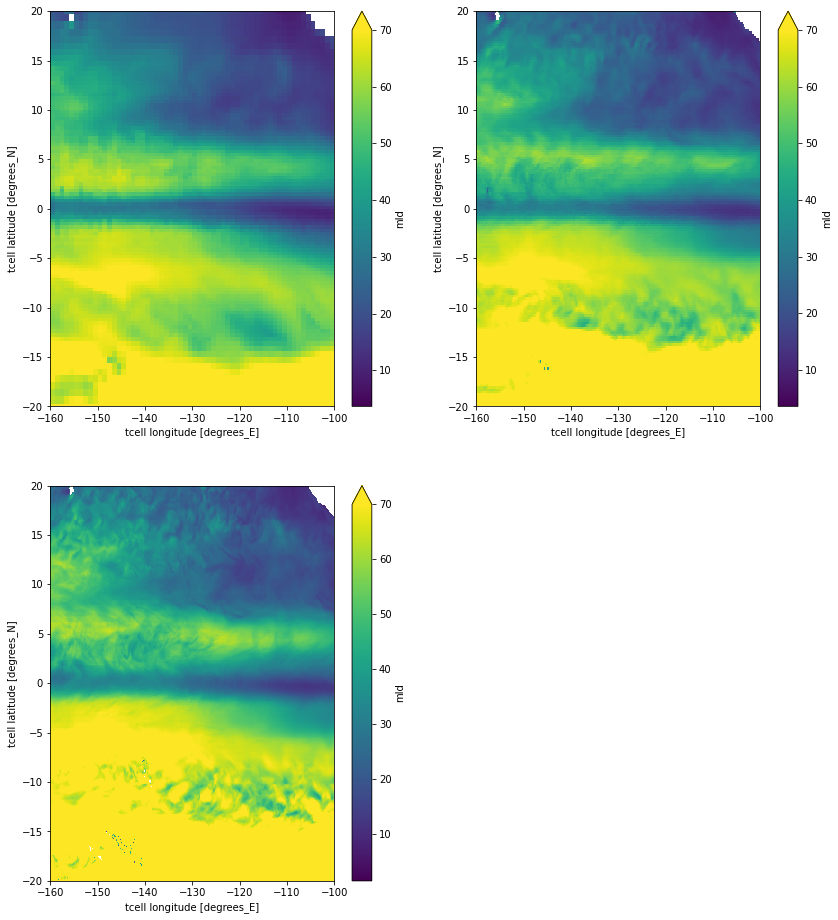

In [13]:
fig = plt.figure(figsize=(14,16))

def is_jja(month):
    return (month >= 6) & (month <= 8)

keys = ['1degRYF','025degRYF','01degRYF']
for i, key in enumerate(keys):
    ax = plt.subplot(2,2,i+1)
    
    var = cc.querying.getvar(exptdict[key]['expt'], 'mld',session, frequency='1 monthly',n=exptdict[key]['n_files'],start_time=exptdict[key]['itime'],end_time=exptdict[key]['ftime'])
    var = var.sel(time=is_jja(var['time.month'])).mean('time')
    var.plot(ax=ax,vmax=70.)
    ax.set_xlim([-160.,-100.])
    ax.set_ylim([-20.,20.])

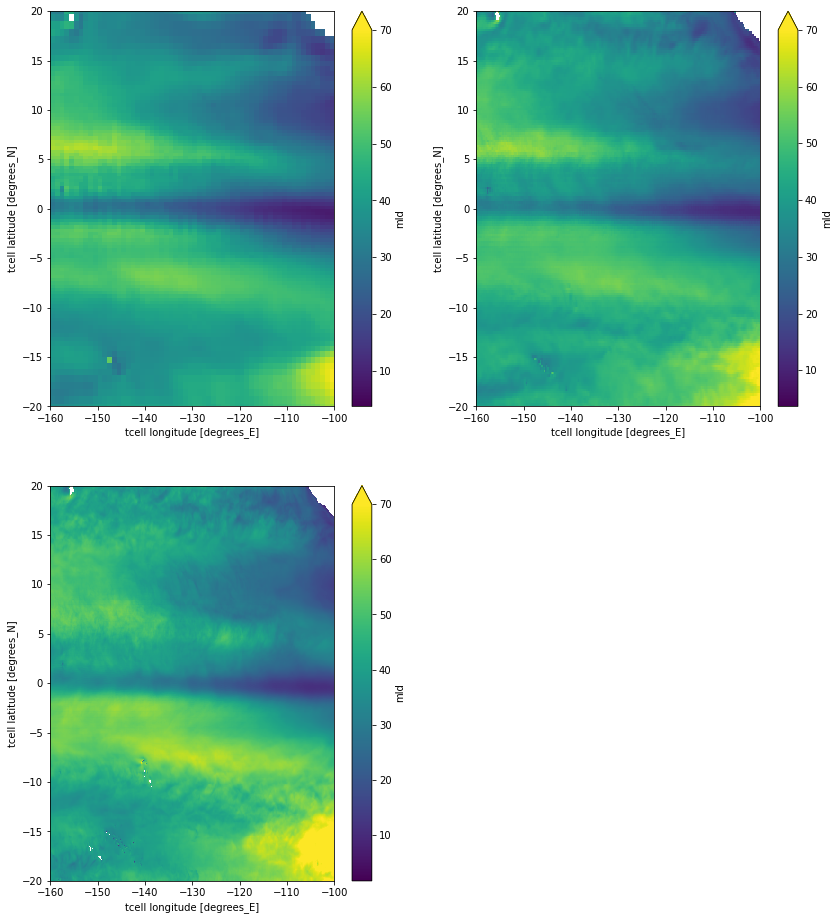

In [14]:
fig = plt.figure(figsize=(14,16))

def is_jja(month):
    return (month >= 1) & (month <= 12)

keys = ['1degRYF','025degRYF','01degRYF']
for i, key in enumerate(keys):
    ax = plt.subplot(2,2,i+1)
    
    var = cc.querying.getvar(exptdict[key]['expt'], 'mld',session, frequency='1 monthly',n=exptdict[key]['n_files'],start_time=exptdict[key]['itime'],end_time=exptdict[key]['ftime'])
    var = var.sel(time=is_jja(var['time.month'])).mean('time')
    var.plot(ax=ax,vmax=70.)
    ax.set_xlim([-160.,-100.])
    ax.set_ylim([-20.,20.])

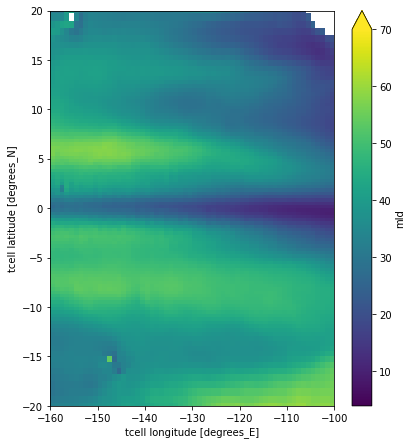

In [18]:
fig = plt.figure(figsize=(14,16))

def is_jja(month):
    return (month >= 1) & (month <= 12)

keys = ['1degIAF']#,'025degIAF','01degIAF']
for i, key in enumerate(keys):
    ax = plt.subplot(2,2,i+1)
    
    var = cc.querying.getvar(exptdict[key]['expt'], 'mld',session, frequency='1 monthly',n=exptdict[key]['n_files'],start_time=exptdict[key]['itime'],end_time=exptdict[key]['ftime'])
    var = var.sel(time=is_jja(var['time.month'])).mean('time')
    var.plot(ax=ax,vmax=70.)
    ax.set_xlim([-160.,-100.])
    ax.set_ylim([-20.,20.])

In [11]:
cc.querying.get_variables(session, experiment=exptdict[key]['expt'], frequency='1 monthly')

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end


In [20]:
var = cc.querying.getvar(exptdict[key]['expt'], 'mld',session, frequency='1 monthly',n=exptdict[key]['n_files'],start_time=exptdict[key]['itime'],end_time=exptdict[key]['ftime'])
var

<xarray.DataArray 'mld' (time: 60, yt_ocean: 300, xt_ocean: 360)>
dask.array<open_dataset-e5de56e6a13d8030869c867a1788af7emld, shape=(60, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 2253-01-16T12:00:00 ... 2257-12-16T12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
Attributes:
    long_name:      mixed layer depth determined by density criteria
    units:          m
    valid_range:    [      0. 1000000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    time_bounds:    <xarray.DataArray 'time_bounds' (time: 60, nv: 2)>\ndask....
    ncfiles:        ['/g/data/hh5/tmp/cosima/access-om2/1deg_jra55v13_iaf_spi...
    contact:        Abhishek Savita
    email:          Abhishek.Savita@csiro.au
    created:        2019-04-12
    description:    1 degree ACCESS-OM2 global model configuration under inte...
    notes:          Source code: https://github.com/COSIMA/access-om2/release...